In [38]:
import pandas as pd

# Load the training dataset
training_file_path = 'Datasets/set2_500_patients.csv'  # Adjust the path if needed
training_data = pd.read_csv(training_file_path, delimiter=';')

# Display basic information and the first few rows to ensure it's loaded correctly
print(training_data.info())
print(training_data.head())
training_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344065 entries, 0 to 344064
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      344065 non-null  int64  
 1   day             344065 non-null  int64  
 2   hour            344065 non-null  int64  
 3   action          344065 non-null  object 
 4   alertness       344065 non-null  float64
 5   hypertension    344065 non-null  float64
 6   intoxication    344065 non-null  float64
 7   heart_attack    344065 non-null  bool   
 8   accident        344065 non-null  bool   
 9   smoker          344065 non-null  float64
 10  overweight      344065 non-null  float64
 11  family_history  344065 non-null  float64
 12  goof_ball       344065 non-null  float64
 13  subject         344065 non-null  int64  
dtypes: bool(2), float64(7), int64(4), object(1)
memory usage: 32.2+ MB
None
   Unnamed: 0  day  hour  action  alertness  hypertension  intoxication  \
0

,Unnamed: 0,day,hour,alertness,hypertension,intoxication,smoker,overweight,family_history,goof_ball,subject
count,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000,344065.000000
mean,172032.000000,14.191696,11.494645,0.757026,0.301734,0.024912,0.494478,0.510914,0.502995,0.485465,249.158380
std,99323.154522,8.649730,6.920627,0.914594,0.299578,0.029532,0.280098,0.294170,0.285025,0.297668,144.614997
min,0.000000,0.000000,0.000000,-26.977580,0.000000,0.000000,0.002733,0.000186,0.005628,0.000335,0.000000
25%,86016.000000,7.000000,5.000000,0.534651,0.052048,0.001039,0.261081,0.267065,0.270245,0.215807,125.000000
50%,172032.000000,14.000000,11.000000,0.875667,0.215006,0.014287,0.477806,0.501043,0.499253,0.489028,247.000000
75%,258048.000000,22.000000,17.000000,1.137058,0.464495,0.038676,0.730244,0.765045,0.753690,0.750683,376.000000
max,344064.000000,29.000000,23.000000,8.005291,1.968238,0.220624,0.996607,0.996473,0.994115,0.999426,499.000000


In [19]:
# Calculate statistics for the entire dataset (unfiltered)
overall_stats = training_data[['alertness', 'hypertension', 'intoxication', 'smoker', 
                               'overweight', 'family_history', 'goof_ball']].describe()

# Get the overall means
overall_means = overall_stats.loc['mean']

# Filter the dataset to include only cases where 'action' is 'patient died'
death_cases = training_data[training_data['action'] == 'patient died']

# Calculate statistics for the filtered data
death_case_stats = death_cases[['alertness', 'hypertension', 'intoxication', 'smoker', 
                                'overweight', 'family_history', 'goof_ball']].describe()

# Get the means for the death cases
death_case_means = death_case_stats.loc['mean']

# Combine the means for comparison
mean_comparison = pd.DataFrame({'Overall Mean': overall_means, 'Death Case Mean': death_case_means})

# Print the comparison
print(mean_comparison)



                Overall Mean  Death Case Mean
alertness           0.757026         0.626858
hypertension        0.301734         1.472701
intoxication        0.024912         0.101353
smoker              0.494478         0.494700
overweight          0.510914         0.590711
family_history      0.502995         0.501246
goof_ball           0.485465         0.466588


In [16]:

def rule_based_predictions_with_death(row):
    # Initialize predictions
    heart_attack_pred = False
    accident_pred = False
    death_pred = False
    # Rule for predicting heart attack
    def check_heartattack():
        if row['hypertension'] > 1.0 and (row['action'] != "coffee" or row['action'] != "alcohol"):
            heart_attack_pred = True
    # Rule for predicting accident
    def check_accident():
        if row['alertness'] < 0.0 and row['intoxication'] > 0.1:
            accident_pred = True

    # Rule for predicting death
    if row['hypertension'] > 1.4 and row['action'] != "coffee" and row['action'] != "alcohol" and row['intoxication'] > 0.09:
        death_pred = True
    
    return pd.Series([heart_attack_pred, accident_pred, death_pred], 
                     index=['heart_attack_pred', 'accident_pred', 'death_pred'])

# Apply the updated rule-based predictions to the training dataset
training_results_with_death = training_data.apply(rule_based_predictions_with_death, axis=1)

# Combine the predictions with the original training data
training_data_with_predictions = pd.concat([training_data, training_results_with_death], axis=1)

# Display the first few rows with predictions
print(training_data_with_predictions.head())


   Unnamed: 0  day  hour  action  alertness  hypertension  intoxication  \
0           0    0     0  coffee   1.394465      0.114070           0.0   
1           1    0     1   sleep   0.774357      0.067966           0.0   
2           2    0     2   sleep   1.281268      0.040496           0.0   
3           3    0     3   sleep   1.123732      0.024128           0.0   
4           4    0     4   sleep   1.247691      0.014376           0.0   

   heart_attack  accident    smoker  overweight  family_history  goof_ball  \
0         False     False  0.671647    0.730691        0.322668   0.653565   
1         False     False  0.671647    0.730691        0.322668   0.653565   
2         False     False  0.671647    0.730691        0.322668   0.653565   
3         False     False  0.671647    0.730691        0.322668   0.653565   
4         False     False  0.671647    0.730691        0.322668   0.653565   

   subject  heart_attack_pred  accident_pred  death_pred  
0        0           

In [21]:
# Load the test dataset
test_file_path = 'Datasets/set3_500_patients.xlsx'  # Update with your actual path
test_data = pd.read_excel(test_file_path)

# Display the first few rows to ensure it's loaded correctly
print(test_data.head())


   Unnamed: 0  day  hour   action  alertness  hypertension  intoxication  \
0           0    0     0     work   1.127998      0.000000       0.00000   
1           1    0     1    sleep   0.819486      0.000000       0.00000   
2           2    0     2    sleep   0.685674      0.000000       0.00000   
3           3    0     3    sleep   1.147203      0.000000       0.00000   
4           4    0     4  alcohol   1.121604      0.236082       0.01741   

   heart_attack  accident    smoker  overweight  family_history  goof_ball  \
0         False     False  0.708133    0.838291        0.300351   0.920894   
1         False     False  0.708133    0.838291        0.300351   0.920894   
2         False     False  0.708133    0.838291        0.300351   0.920894   
3         False     False  0.708133    0.838291        0.300351   0.920894   
4         False     False  0.708133    0.838291        0.300351   0.920894   

   subject  
0        0  
1        0  
2        0  
3        0  
4        

In [37]:
# Apply the rule-based predictions function to the test dataset
test_results = test_data.apply(rule_based_predictions_with_death, axis=1)
raw_pred = test_results
# Combine the predictions with the original test data
 test_data_with_predictions = pd.concat([test_data, test_results], axis=1)

# Display the test dataset with the predictions
 print(test_data_with_predictions.head())


,heart_attack_pred,accident_pred,death_pred
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


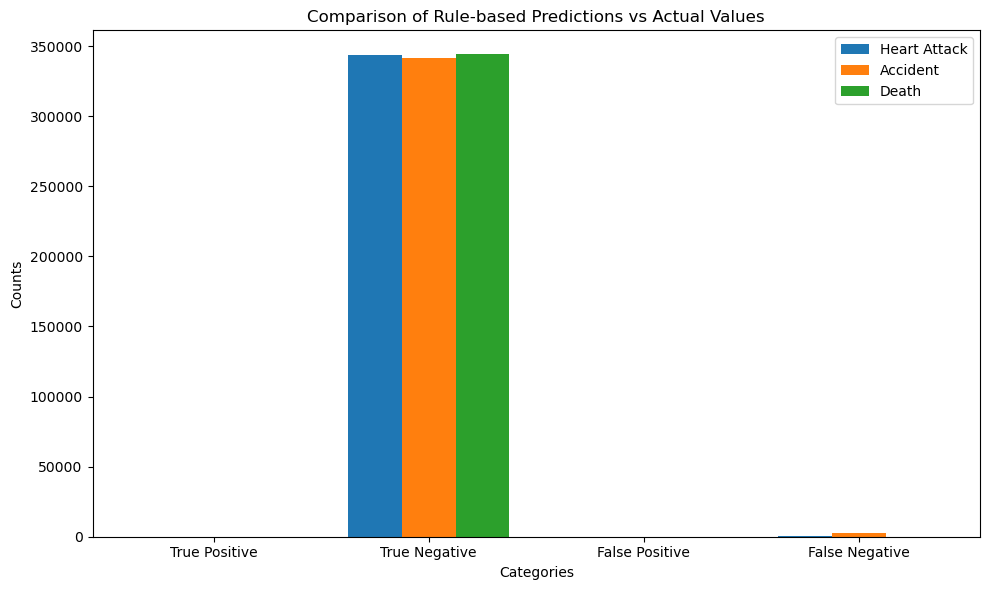

In [28]:
import matplotlib.pyplot as plt

# Extract the actual and predicted values
actual_heart_attack = training_data['heart_attack']
actual_accident = training_data['accident']
actual_death = training_data['action'] == 'patient died'

predicted_heart_attack = training_data_with_predictions['heart_attack_pred']
predicted_accident = training_data_with_predictions['accident_pred']
predicted_death = training_data_with_predictions['death_pred']

# Function to count true positives, true negatives, false positives, and false negatives
def count_matches(actual, predicted):
    true_positive = sum((actual == True) & (predicted == True))
    true_negative = sum((actual == False) & (predicted == False))
    false_positive = sum((actual == False) & (predicted == True))
    false_negative = sum((actual == True) & (predicted == False))
    return true_positive, true_negative, false_positive, false_negative

# Get counts for heart attacks
heart_attack_counts = count_matches(actual_heart_attack, predicted_heart_attack)
accident_counts = count_matches(actual_accident, predicted_accident)
death_counts = count_matches(actual_death, predicted_death)

# Plotting
labels = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

x = range(len(labels))
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plotting heart attack counts
ax.bar(x, heart_attack_counts, width, label='Heart Attack')

# Plotting accident counts
ax.bar([i + width for i in x], accident_counts, width, label='Accident')

# Plotting death counts
ax.bar([i + width * 2 for i in x], death_counts, width, label='Death')

# Setting labels and titles
ax.set_xlabel('Categories')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Rule-based Predictions vs Actual Values')
ax.set_xticks([i + width for i in x])
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


Correct prediction counts:
Heart Attack: 343469 out of 344065
Accident: 341459 out of 344065
Death: 344002 out of 344065

Accuracy for Heart Attack prediction: 0.9983
Accuracy for Accident prediction: 0.9924
Accuracy for Death prediction: 0.9998
Overall accuracy (all three correct): 0.9910

First few rows of actual vs predicted (True = correct prediction):
   Heart Attack Correct  Accident Correct  Death Correct
0                  True              True           True
1                  True              True           True
2                  True              True           True
3                  True              True           True
4                  True              True           True
5                  True              True           True
6                  True              True           True
7                  True              True           True
8                  True              True           True
9                  True              True           True


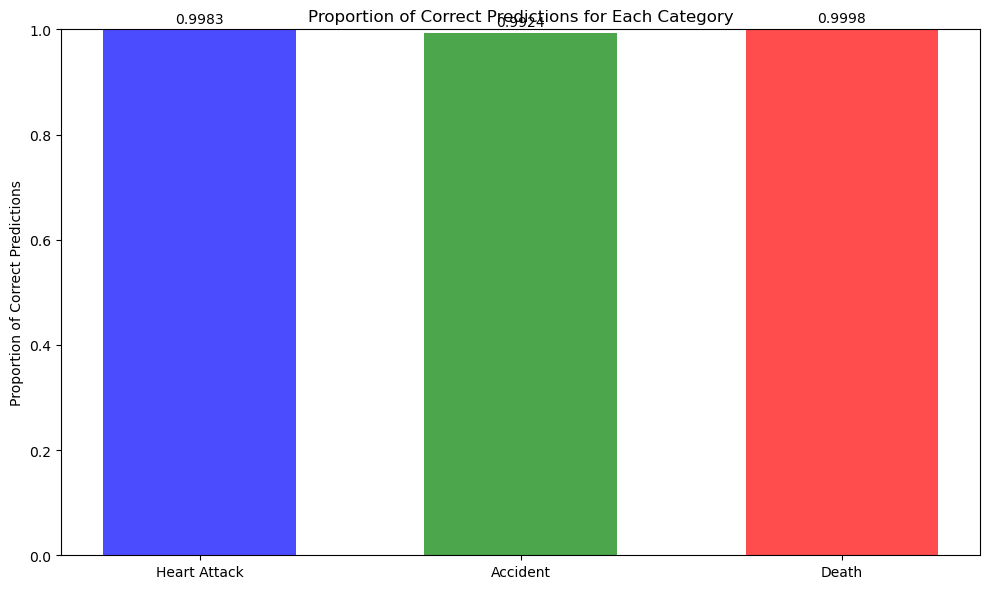

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Ensure boolean conversion
actual_heart_attack = training_data['heart_attack'].astype(bool)
actual_accident = training_data['accident'].astype(bool)
actual_death = training_data['action'] == "TRUE"

predicted_heart_attack = training_data_with_predictions['heart_attack_pred'].astype(bool)
predicted_accident = training_data_with_predictions['accident_pred'].astype(bool)
predicted_death = training_data_with_predictions['death_pred'].astype(bool)

# Create masks for correct predictions
correct_heart_attack = (actual_heart_attack == predicted_heart_attack)
correct_accident = (actual_accident == predicted_accident)
correct_death = (actual_death == predicted_death)

# Print debug information
print("Correct prediction counts:")
print(f"Heart Attack: {correct_heart_attack.sum()} out of {len(actual_heart_attack)}")
print(f"Accident: {correct_accident.sum()} out of {len(actual_accident)}")
print(f"Death: {correct_death.sum()} out of {len(actual_death)}")

# Calculate proportions of correct predictions
prop_correct_heart_attack = correct_heart_attack.mean()
prop_correct_accident = correct_accident.mean()
prop_correct_death = correct_death.mean()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of the bars
x = np.arange(3)

# Create the bars
bars = ax.bar(x, [prop_correct_heart_attack, prop_correct_accident, prop_correct_death], 
              width=0.6, color=['blue', 'green', 'red'], alpha=0.7)

# Customize the plot
ax.set_ylabel('Proportion of Correct Predictions')
ax.set_title('Proportion of Correct Predictions for Each Category')
ax.set_xticks(x)
ax.set_xticklabels(['Heart Attack', 'Accident', 'Death'])
ax.set_ylim(0, 1)  # Set y-axis limit from 0 to 1

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars)

plt.tight_layout()

# Calculate accuracy (same as proportion of correct predictions)
accuracy_heart_attack = prop_correct_heart_attack
accuracy_accident = prop_correct_accident
accuracy_death = prop_correct_death

overall_accuracy = (correct_heart_attack & correct_accident & correct_death).mean()

print("\nAccuracy for Heart Attack prediction: {:.4f}".format(accuracy_heart_attack))
print("Accuracy for Accident prediction: {:.4f}".format(accuracy_accident))
print("Accuracy for Death prediction: {:.4f}".format(accuracy_death))
print("Overall accuracy (all three correct): {:.4f}".format(overall_accuracy))

# Additional debugging: print a few rows of actual vs predicted
print("\nFirst few rows of actual vs predicted (True = correct prediction):")
debug_df = pd.DataFrame({
    'Heart Attack Correct': correct_heart_attack,
    'Accident Correct': correct_accident,
    'Death Correct': correct_death
})
print(debug_df.head(10))

plt.show()


Metrics for Heart Attack:
True Negatives: 343469
False Positives: 0
False Negatives: 596
True Positives: 0
Accuracy: 0.9983
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Note: No positive predictions were made.


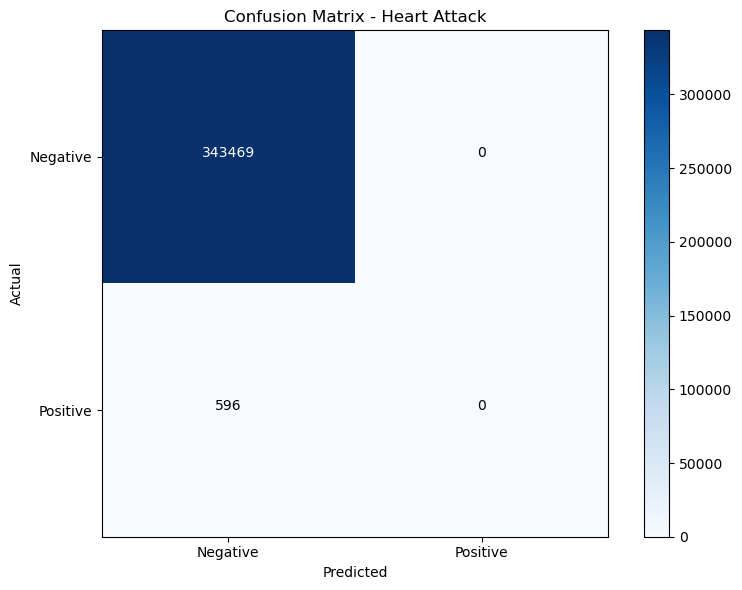


Metrics for Accident:
True Negatives: 341459
False Positives: 0
False Negatives: 2606
True Positives: 0
Accuracy: 0.9924
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Note: No positive predictions were made.


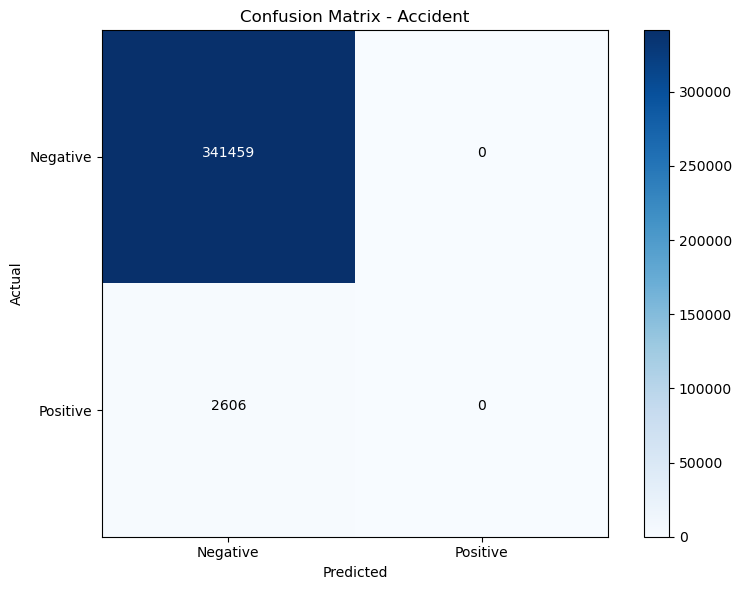


Metrics for Death:
True Negatives: 344002
False Positives: 63
False Negatives: 0
True Positives: 0
Accuracy: 0.9998
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Note: No actual positive cases in the data.


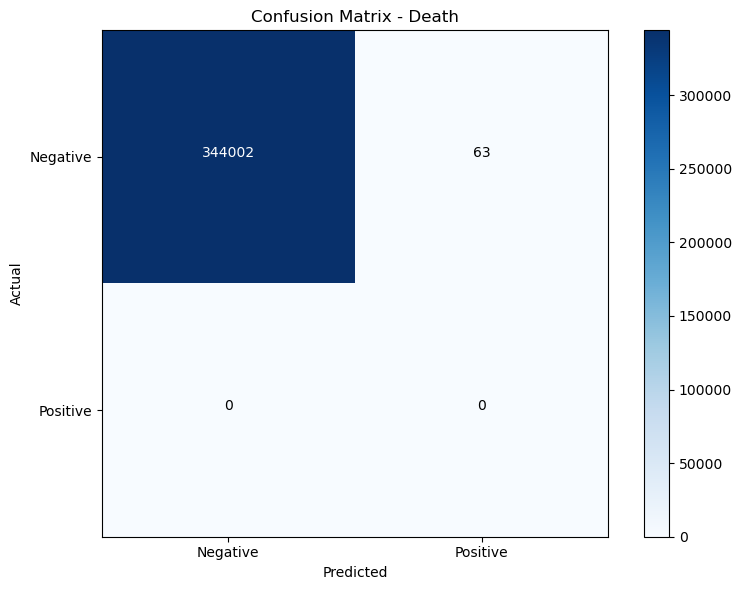


Overall accuracy (all three correct): 0.9910

Heart Attack:
Actual positive rate: 0.0017
Predicted positive rate: 0.0000

Accident:
Actual positive rate: 0.0076
Predicted positive rate: 0.0000

Death:
Actual positive rate: 0.0000
Predicted positive rate: 0.0002


In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Ensure boolean conversion
actual_heart_attack = training_data['heart_attack'].astype(bool)
actual_accident = training_data['accident'].astype(bool)
actual_death = training_data['action'] == "TRUE"

predicted_heart_attack = training_data_with_predictions['heart_attack_pred'].astype(bool)
predicted_accident = training_data_with_predictions['accident_pred'].astype(bool)
predicted_death = training_data_with_predictions['death_pred'].astype(bool)

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Negative', 'Positive'])
    plt.yticks(tick_marks, ['Negative', 'Positive'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    # Add text annotations
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.show()

def print_metrics(y_true, y_pred, category):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nMetrics for {category}:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    if tp + fp == 0:
        print("Note: No positive predictions were made.")
    if tp + fn == 0:
        print("Note: No actual positive cases in the data.")
    
    plot_confusion_matrix(cm, f'Confusion Matrix - {category}')

# Heart Attack
print_metrics(actual_heart_attack, predicted_heart_attack, "Heart Attack")

# Accident
print_metrics(actual_accident, predicted_accident, "Accident")

# Death
print_metrics(actual_death, predicted_death, "Death")

# Overall accuracy
overall_accuracy = ((actual_heart_attack == predicted_heart_attack) & 
                    (actual_accident == predicted_accident) & 
                    (actual_death == predicted_death)).mean()

print(f"\nOverall accuracy (all three correct): {overall_accuracy:.4f}")

# Print prediction and actual positive rates
for category, actual, predicted in [("Heart Attack", actual_heart_attack, predicted_heart_attack),
                                    ("Accident", actual_accident, predicted_accident),
                                    ("Death", actual_death, predicted_death)]:
    print(f"\n{category}:")
    print(f"Actual positive rate: {actual.mean():.4f}")
    print(f"Predicted positive rate: {predicted.mean():.4f}")